In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import lightgbm as lgb

In [2]:
covertype = fetch_covtype() # https://archive.ics.uci.edu/dataset/31/covertype
X = covertype.data
y = covertype.target
print(X.shape,y.shape)

(581012, 54) (581012,)


In [3]:
import numpy as np
y = y-1
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6])

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# Set the parameters for the LightGBM model
params = {
    'objective': 'multiclass',
    'num_class': 7,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'min_data_in_leaf': 20,
    'n_estimators': 100,
}

# Train the model
lgbm_classifier = lgb.train(params,
                       train_data,
                       valid_sets=val_data,
                       num_boost_round=1000)

# Prediction
y_pred_lgb = lgbm_classifier.predict(X_val, num_iteration=lgbm_classifier.best_iteration)

# Convert the probabilities to class labels
y_pred_lgb = np.argmax(y_pred_lgb, axis=1)

accuracy_lgb = accuracy_score(y_val, y_pred_lgb)
precision_lgb = precision_score(y_val, y_pred_lgb, average='weighted')
recall_lgb = recall_score(y_val, y_pred_lgb, average='weighted')
f1_lgb = f1_score(y_val, y_pred_lgb, average='weighted')

print("LightGBM Classifier Metrics:")
print("Accuracy:", accuracy_lgb)
print("Precision:", precision_lgb)
print("Recall:", recall_lgb)
print("Weighted F1 Score:", f1_lgb)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019258 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2262
[LightGBM] [Info] Number of data points in the train set: 464809, number of used features: 53
[LightGBM] [Info] Start training from score -1.010055
[LightGBM] [Info] Start training from score -0.717554
[LightGBM] [Info] Start training from score -2.787067
[LightGBM] [Info] Start training from score -5.343669
[LightGBM] [Info] Start training from score -4.126990
[LightGBM] [Info] Start training from score -3.511322
[LightGBM] [Info] Start training from score -3.338569
LightGBM Classifier Metrics:
Accuracy: 0.8513807733018941
Precision: 0.8509837708394188
Recall: 0.8513807733018941
Weighted F1 Score: 0.8508443549415919


In [16]:
print(classification_report(y_val, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83     42557
           1       0.85      0.88      0.87     56500
           2       0.89      0.91      0.90      7121
           3       0.83      0.78      0.80       526
           4       0.73      0.62      0.67      1995
           5       0.83      0.81      0.82      3489
           6       0.90      0.86      0.88      4015

    accuracy                           0.85    116203
   macro avg       0.84      0.81      0.82    116203
weighted avg       0.85      0.85      0.85    116203



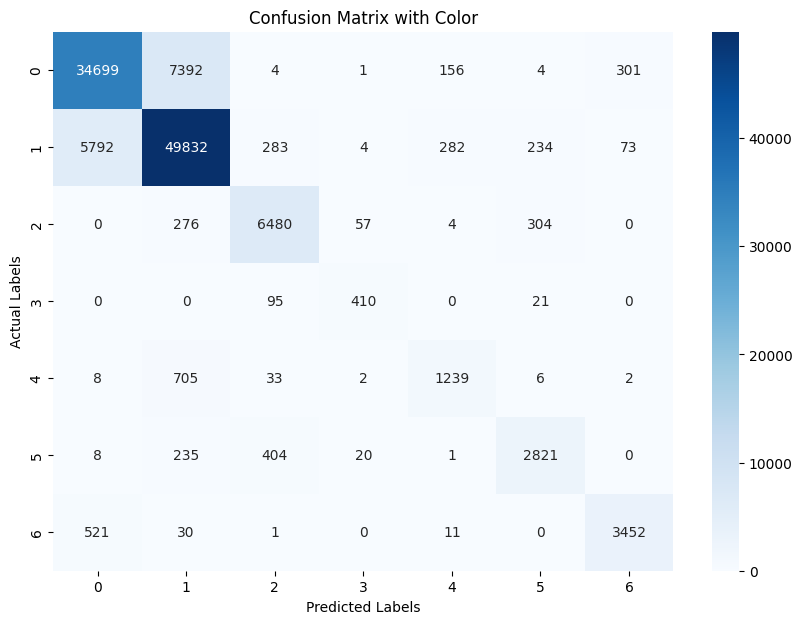

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# For illustration purposes, we'll create a dummy set of true and predicted labels
true_labels = y_val
predicted_labels = y_pred_lgb

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plotting using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')  # 'g' formats as decimal integer
plt.title('Confusion Matrix with Color')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()